## 1. Import Libraries and Modules

This code imports essential libraries and modules required for data manipulation, visualisation, preprocessing, and building machine learning models. Each library serves a specific purpose in the data analysis and model training pipeline.


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


2024-05-26 11:20:21.660121: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2. Load and Prepare the DJIA Data

The following code reads the Dow Jones Industrial Average (DJIA) data from a CSV file into a pandas DataFrame, performs initial checks, converts the date column to datetime format to facilitate time series analysis, and sorts the data by date for chronological order.


In [2]:
# Read the CSV file containing the Dow Jones Industrial Average (DJIA) data into a pandas DataFrame
data=pd.read_csv('upload_DJIA_table.csv')


# Display the first three rows of the DataFrame to check the data
data[0:3]

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


In [3]:
# Convert the 'Date' column to datetime
data['Date']=pd.to_datetime(data['Date'])

# Sort data by date
data=data.sort_values('Date')

## 3. Calculate and Plot the 7-Day Rolling Mean

This calculates the 7-day rolling mean of the 'Open' prices from the dataset and adds it as a new column called `Rolling_Mean`. This rolling mean is then plotted against the date to visualise the trends in the DJIA over time.

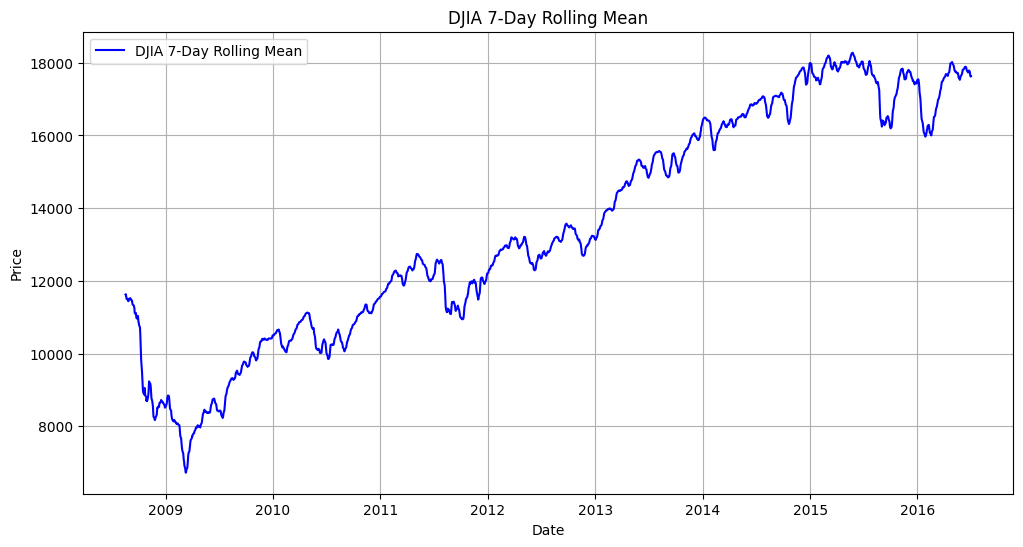

In [4]:
# Calculate the 7-day rolling mean of the 'Open' prices and add it as a new column in the DataFrame
data['Rolling_Mean'] = data['Open'].rolling(window=7).mean()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Rolling_Mean'], label='DJIA 7-Day Rolling Mean', color='b')
plt.title('DJIA 7-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## 4. Split Data into Training and Test Sets for Visualisation

The following code splits the DJIA dataset into training and test sets and then visualises the split data to ensure proper separation and distribution. The dataset is split using `train_test_split` from `sklearn.model_selection`, with 20% of the data reserved for testing (`test_size=0.2`). The `shuffle=False` parameter ensures that the data is not shuffled, preserving the chronological order essential for time series analysis.

After splitting the data, a line plot is created to visualise the training and test data. The training data is plotted in blue, while the test data is plotted in red. The plot includes titles, axis labels, and a legend to clearly differentiate between the training and test datasets.

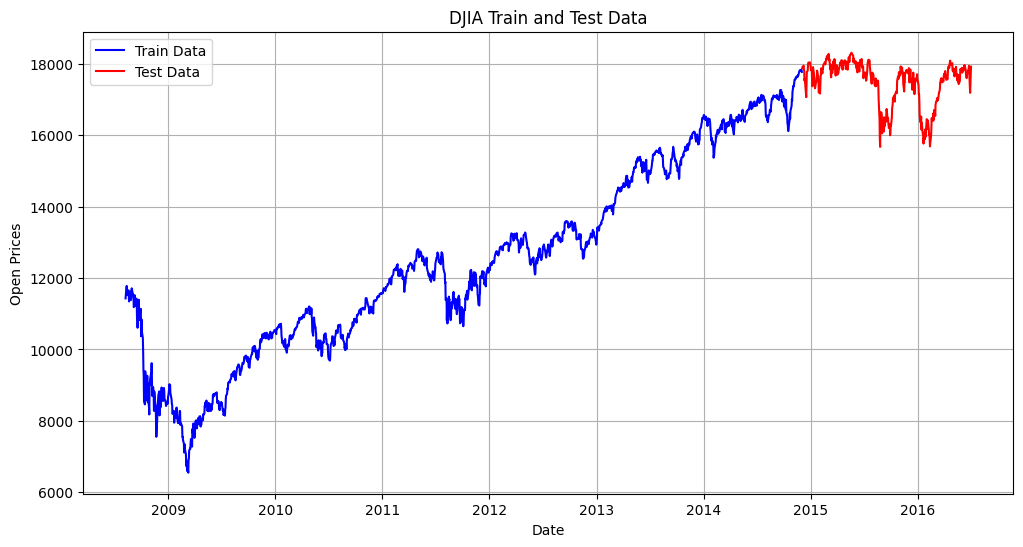

In [5]:
# Splitting the data into train and test sets using train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Plot the data
plt.figure(figsize=(12, 6))

# Plot train data
plt.plot(train_data['Date'], train_data['Open'], label='Train Data', color='blue')

# Plot test data
plt.plot(test_data['Date'], test_data['Open'], label='Test Data', color='red')

# Add title and labels
plt.title('DJIA Train and Test Data')
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## 5. Inspect Test Data and Dataset Sizes

The following code displays the first few rows of the test dataset and prints the number of samples in both the training and test datasets. This helps verify the data splitting and provides insight into the dataset sizes. First, the initial three rows of the test dataset are displayed to inspect the structure and contents. Then, the number of samples in the training and test datasets is printed to verify the split ratio and ensure the data is divided correctly.



In [6]:
# Display the first three rows of the test dataset
test_data[0:3]

,Date,Open,High,Low,Close,Volume,Adj Close,Rolling_Mean
397,2014-12-03,17880.900391,17924.150391,17855.589844,17912.619141,99400000,17912.619141,17823.071707
396,2014-12-04,17910.019531,17937.960938,17814.810547,17900.099609,76270000,17900.099609,17836.984375
395,2014-12-05,17903.050781,17991.189453,17903.050781,17958.789062,79110000,17958.789062,17848.984375


In [7]:
# Print the number of samples in the train and test datasets
print(len(train_data))
print(len(test_data))

1591
398


## 6. Load, Prepare, and Scale Data for Model Training

The following code includes several functions that load, prepare, scale the data, and create sequences required for training the LSTM model. The `main` function orchestrates these steps and prints the shapes of the training data and labels.

1. **Load and Prepare Data**:
    - The `load_and_prepare_data` function reads the data from a CSV file, converts the 'Date' column to datetime format, and sorts the data by date.

2. **Scale Data**:
    - The `scale_data` function normalizes the 'Open' prices in the training and test datasets using `MinMaxScaler` from `sklearn.preprocessing`. The scaled data and the scaler object are returned.

3. **Create Sequences**:
    - The `create_sequences` function generates sequences of data for the LSTM model. It takes the scaled data, the number of prediction days, and the prediction shift as inputs, and returns the input and output sequences.

4. **Main Function**:
    - The `main` function orchestrates the loading, splitting, scaling, and sequence creation processes. It prints the shapes of the training data and labels to verify the preprocessing steps.

Finally, the script runs the `main` function, which returns the prepared training data, labels, and the scaler object.


In [8]:
def load_and_prepare_data(file_path):
    # Load data
    data = pd.read_csv(file_path)

    # Convert the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Sort data by date
    data = data.sort_values('Date')
    
    return data

def scale_data(train_data, test_data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_train_data = scaler.fit_transform(train_data['Open'].values.reshape(-1, 1))
    scaled_test_data = scaler.transform(test_data['Open'].values.reshape(-1, 1))
    return scaled_train_data, scaled_test_data, scaler

def create_sequences(data, prediction_days, prediction_shift):
    x = []
    y = []
    
    for i in range(prediction_days, len(data) - prediction_shift):
        x.append(data[i - prediction_days:i, 0])
        y.append(data[i + prediction_shift, 0])
        
    x, y = np.array(x), np.array(y)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    
    return x, y

def main():
    file_path = 'upload_DJIA_table.csv'
    prediction_days = 30
    prediction_shift = 5
    
    data = load_and_prepare_data(file_path)
    
    # Splitting the data into train and test sets
    train_data, test_data = train_test_split(data, test_size=0.20, shuffle=False)
    
    # Scaling the data
    scaled_train_data, scaled_test_data, scaler = scale_data(train_data, test_data)
    
    # Creating sequences
    x_train, y_train = create_sequences(scaled_train_data, prediction_days, prediction_shift)
    
    print("Training data shape:", x_train.shape)
    print("Training labels shape:", y_train.shape)
    
    return x_train, y_train, scaler

if __name__ == "__main__":
    x_train, y_train, scaler = main()

Training data shape: (1556, 30, 1)
Training labels shape: (1556,)


## 7. Create and Compile LSTM Model

The following code defines a function to create and compile an LSTM model for time series prediction. The function configures the model architecture, including LSTM layers, dropout for regularisation, and an output layer, and then compiles the model using the Adam optimizer and mean squared error loss function.

1. **Function to Create LSTM Model**:
    - The `create_lstm_model` function takes three parameters: `input_shape` (the shape of the input data), `units` (the number of LSTM units in each layer), and `dropout_rate` (the dropout rate for regularisation).
    - The function returns a compiled LSTM model.

2. **Model Architecture**:
    - An input layer is added to accept the shape of the input data.
    - Three LSTM layers are configured, each followed by a dropout layer to prevent overfitting.
    - A dense output layer is added to produce the final prediction.

3. **Compile the Model**:
    - The model is compiled using the Adam optimiser and mean squared error loss function, with accuracy as an additional metric.

4. **Create and Summarize the Model**:
    - The `input_shape` is defined based on the shape of the training data (`x_train`).
    - The LSTM model is created by calling `create_lstm_model` with the specified input shape.
    - The model summary is printed to display the architecture and parameters.


In [9]:
def create_lstm_model(input_shape, units=50, dropout_rate=0.2):
    """
    Create and compile an LSTM model.
    
    Parameters:
    input_shape (tuple): Shape of the input data (timesteps, features).
    units (int): Number of LSTM units in each layer.
    dropout_rate (float): Dropout rate for regularization.
    
    Returns:
    model (Sequential): Compiled LSTM model.
    """
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=input_shape))
    
    # First LSTM layer with dropout
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    
    # Second LSTM layer with dropout
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    
    # Third LSTM layer with dropout
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(units=1))
    
    # Compile the model
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])
    
    return model

# x_train is already defined and preprocessed
input_shape = (x_train.shape[1], 1)

# Create and summarize the model
model = create_lstm_model(input_shape)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

## 8. Train the Model and Visualise Training Progress

The following code trains the LSTM model on the prepared training data and visualises the training and validation loss and accuracy over the epochs. This helps in understanding how well the model is learning and identifying any potential overfitting or underfitting issues.

1. **Fit the Model**:
    - The model is trained using the `fit` method on the training data (`x_train`, `y_train`).
    - The training process runs for 20 epochs with a batch size of 32.
    - 20% of the training data is used for validation to monitor the model's performance on unseen data during training.
    - The `verbose=1` parameter ensures that the training progress is printed to the console.

2. **Plot Training and Validation Loss**:
    - A line plot is created to visualize the training and validation loss over the epochs.
    - The plot includes titles, axis labels, and a legend to differentiate between training and validation loss.

3. **Plot Training and Validation Accuracy**:
    - A line plot is created to visualize the training and validation accuracy over the epochs.
    - The plot includes titles, axis labels, and a legend to differentiate between training and validation accuracy.


Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.0017 - loss: 0.0865 - val_accuracy: 0.0032 - val_loss: 0.0333
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0019 - loss: 0.0056 - val_accuracy: 0.0032 - val_loss: 0.0011
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.0033 - loss: 0.0042 - val_accuracy: 0.0032 - val_loss: 0.0014
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.0026 - loss: 0.0038 - val_accuracy: 0.0032 - val_loss: 0.0014
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.0033 - loss: 0.0037 - val_accuracy: 0.0032 - val_loss: 0.0015
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 4.2583e-04 - loss: 0.0037 - val_accuracy: 0.0032 - val_loss: 0.0011
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 1.2589e-04 - loss: 0.0034 - val_accuracy: 0.0032 - val_loss: 0.0011
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 3.6202e-04 - loss: 0.0034 - val_accuracy

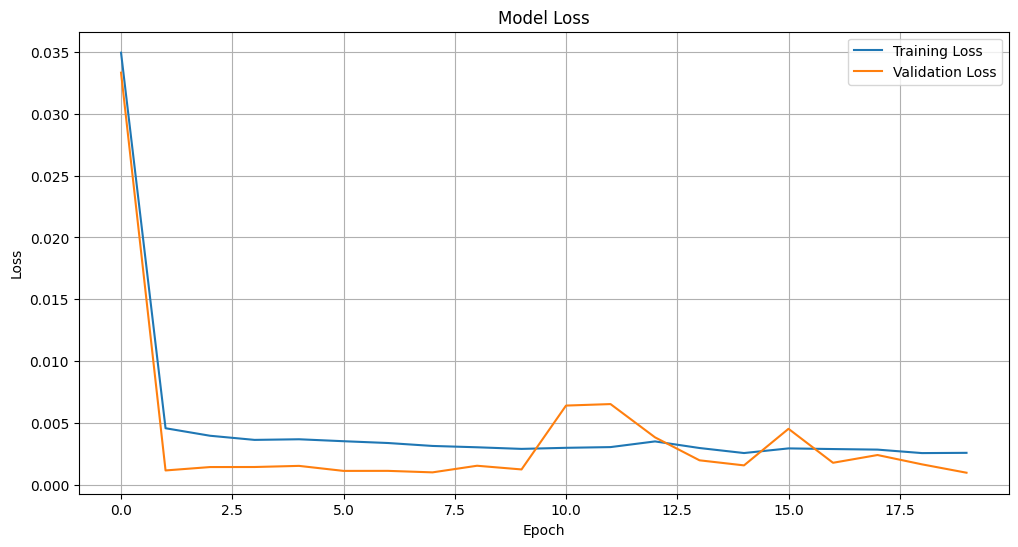

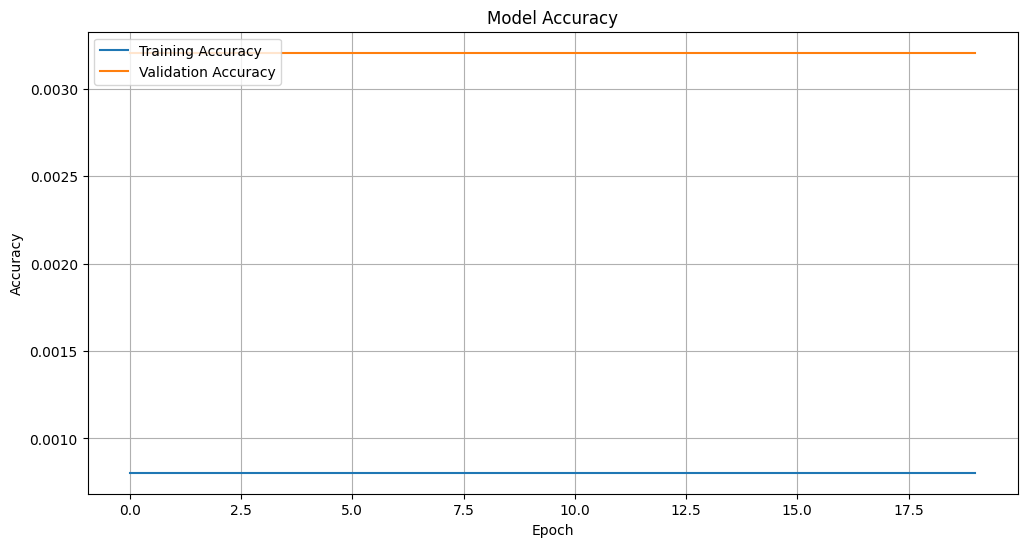

In [10]:
# Fit the model 
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## 9. Load, Preprocess, and Train the LSTM Model

The following code outlines the complete pipeline for loading data, preprocessing it, creating sequences for the LSTM model, building and training the model, and visualising the training progress. Each function serves a specific purpose in preparing the data and training the model.

1. **Load and Prepare Data**:
    - The `load_and_prepare_data` function reads the data from a CSV file, converts the 'Date' column to datetime format, and sorts the data by date.

2. **Scale Data**:
    - The `scale_data` function normalises the 'Open' prices in the training and test datasets using `MinMaxScaler` from `sklearn.preprocessing`. The scaled data and the scaler object are returned.

3. **Create Sequences**:
    - The `create_sequences` function generates sequences of data for the LSTM model. It takes the scaled data, the number of prediction days, and the prediction shift as inputs, and returns the input and output sequences.

4. **Create and Compile LSTM Model**:
    - The `create_lstm_model` function builds and compiles an LSTM model with specified input shape, units, and dropout rate. The model is configured with three LSTM layers, each followed by a dropout layer, and a dense output layer.

5. **Main Function**:
    - The `main` function orchestrates the entire process: loading and preparing data, splitting into training and test sets, scaling the data, creating sequences, and training the LSTM model. The training process includes plotting the training and validation loss to monitor the model's performance.


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.0526 - val_loss: 0.0012
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0042 - val_loss: 0.0046
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0034 - val_loss: 0.0050
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0030 - val_loss: 0.0116
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0029 - val_loss: 9.8607e-04
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss

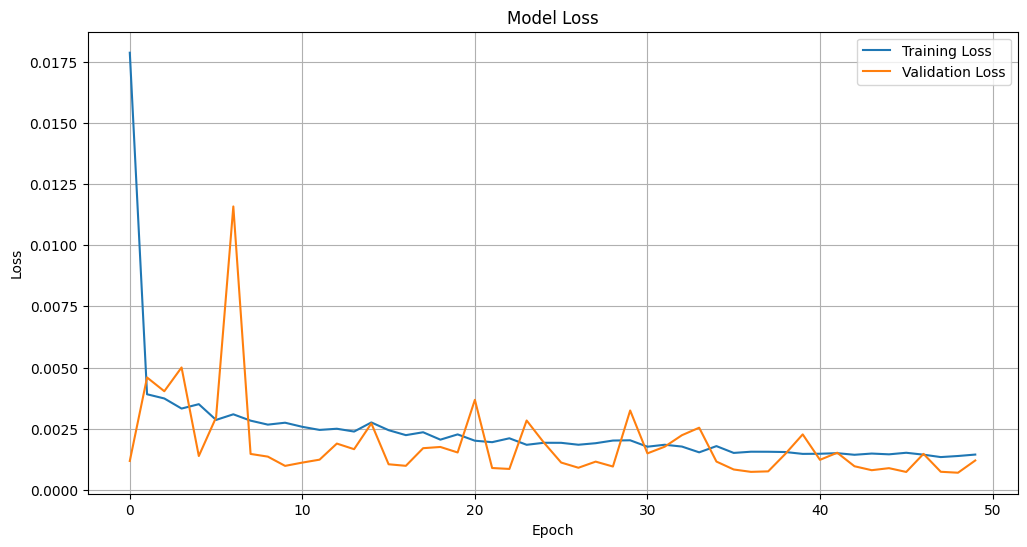

In [11]:
# Load and preprocess data
def load_and_prepare_data(file_path):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values('Date')
    return data

def scale_data(train_data, test_data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_train_data = scaler.fit_transform(train_data['Open'].values.reshape(-1, 1))
    scaled_test_data = scaler.transform(test_data['Open'].values.reshape(-1, 1))
    return scaled_train_data, scaled_test_data, scaler

def create_sequences(data, prediction_days, prediction_shift):
    x = []
    y = []
    for i in range(prediction_days, len(data) - prediction_shift):
        x.append(data[i - prediction_days:i, 0])
        y.append(data[i + prediction_shift, 0])
    x, y = np.array(x), np.array(y)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    return x, y

def create_lstm_model(input_shape, units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Main function to run the pipeline
def main():
    file_path = 'upload_DJIA_table.csv'
    prediction_days = 30
    prediction_shift = 5
    epochs = 50  # Increased epochs for better training
    batch_size = 16  # Adjusted batch size for more frequent updates

    data = load_and_prepare_data(file_path)
    train_data, test_data = train_test_split(data, test_size=0.20, shuffle=False)
    scaled_train_data, scaled_test_data, scaler = scale_data(train_data, test_data)
    x_train, y_train = create_sequences(scaled_train_data, prediction_days, prediction_shift)

    model = create_lstm_model((x_train.shape[1], 1))
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


## 10. Prepare Model Inputs, Create Test Sequences, and Plot Predictions

This section prepares the model inputs for testing, creates test sequences, and plots the actual vs. predicted prices. The `main` function performs these steps to demonstrate the model's prediction capabilities.

1. **Prepare Model Inputs**:
    - The `prepare_model_inputs` function concatenates the training and test data, extracts the relevant portion for prediction, reshapes it, and scales it using the provided scaler.

2. **Create Test Sequences**:
    - The `create_test_sequences` function generates test sequences from the scaled model inputs. It returns the sequences in the required shape for the LSTM model.

3. **Plot Predictions**:
    - The `plot_predictions` function visualises the actual and predicted stock prices. It creates a line plot with actual prices in black and predicted prices in green, including titles, axis labels, and a legend for clarity.

4. **Main Function**:
    - The `main` function orchestrates the process:
        - Loads and preprocesses the data.
        - Splits the data into training and test sets.
        - Scales the data.
        - Prepares the model inputs and creates test sequences.
        - Uses the trained model to make predictions on the test data.
        - Plots the actual vs. predicted prices.
        - Adds the predicted prices to the test data for inspection and prints the first 10 rows.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


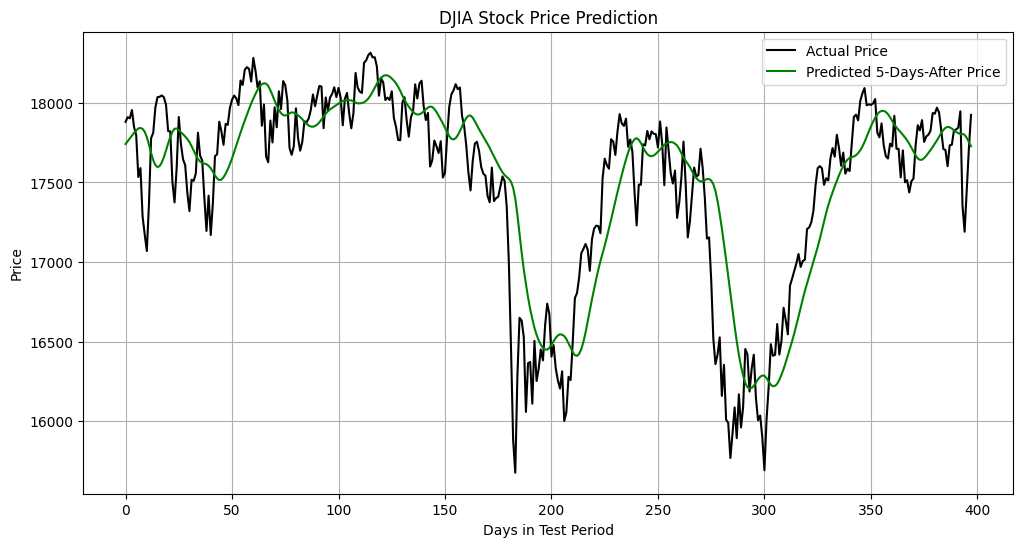

          Date          Open          High           Low         Close  \
397 2014-12-03  17880.900391  17924.150391  17855.589844  17912.619141   
396 2014-12-04  17910.019531  17937.960938  17814.810547  17900.099609   
395 2014-12-05  17903.050781  17991.189453  17903.050781  17958.789062   
394 2014-12-08  17954.939453  17960.560547  17804.279297  17852.480469   
393 2014-12-09  17847.369141  17847.369141  17629.570312  17801.199219   
392 2014-12-10  17797.990234  17797.990234  17508.099609  17533.150391   
391 2014-12-11  17534.300781  17758.509766  17534.300781  17596.339844   
390 2014-12-12  17590.050781  17590.050781  17280.830078  17280.830078   
389 2014-12-15  17285.740234  17403.539062  17115.279297  17180.839844   
388 2014-12-16  17173.070312  17427.439453  17067.589844  17068.869141   

        Volume     Adj Close     Predicted  
397   99400000  17912.619141  17741.623047  
396   76270000  17900.099609  17759.355469  
395   79110000  17958.789062  17776.855469  
394  

In [12]:

def prepare_model_inputs(train_data, test_data, prediction_days, scaler):
    total_dataset = pd.concat((train_data['Open'], test_data['Open']), axis=0)
    model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
    model_inputs = model_inputs.reshape(-1, 1)
    model_inputs = scaler.transform(model_inputs)
    return model_inputs

def create_test_sequences(model_inputs, prediction_days):
    x_test = []
    for i in range(prediction_days, len(model_inputs)):
        x_test.append(model_inputs[i - prediction_days:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    return x_test

def plot_predictions(actual_prices, predicted_prices):
    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, color='black', label='Actual Price')
    plt.plot(predicted_prices, color='green', label='Predicted 5-Days-After Price')
    plt.title('DJIA Stock Price Prediction')
    plt.xlabel('Days in Test Period')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Number of days to use for predictions
    prediction_days = 30  

    # Load and preprocess data (reuse previous functions)
    file_path = 'upload_DJIA_table.csv'
    data = load_and_prepare_data(file_path)
    train_data, test_data = train_test_split(data, test_size=0.20, shuffle=False)
    scaled_train_data, scaled_test_data, scaler = scale_data(train_data, test_data)

    # Prepare model inputs
    model_inputs = prepare_model_inputs(train_data, test_data, prediction_days, scaler)
    x_test = create_test_sequences(model_inputs, prediction_days)

    # Make predictions
    predicted_prices = model.predict(x_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    # Get actual prices
    actual_prices = test_data['Open'].values

    # Plot predictions
    plot_predictions(actual_prices, predicted_prices)

    # Add predicted prices to test_data for inspection
    test_data['Predicted'] = predicted_prices
    print(test_data.head(10))

if __name__ == "__main__":
    main()


## 11. Complete Workflow for Data Preprocessing, Prediction, and Visualisation

The following code outlines the entire workflow for loading and preprocessing data, preparing model inputs, making predictions, and visualising the results. Additionally, it includes a function for making future predictions using the trained LSTM model.

1. **Load and Prepare Data**:
    - The `load_and_prepare_data` function reads the data from a CSV file, converts the 'Date' column to datetime format, and sorts the data by date.

2. **Scale Data**:
    - The `scale_data` function normalizes the 'Open' prices in the training and test datasets using `MinMaxScaler` from `sklearn.preprocessing`. The scaled data and the scaler object are returned.

3. **Prepare Model Inputs**:
    - The `prepare_model_inputs` function concatenates the training and test data, extracts the relevant portion for prediction, reshapes it, and scales it using the provided scaler.

4. **Create Test Sequences**:
    - The `create_test_sequences` function generates test sequences from the scaled model inputs. It returns the sequences in the required shape for the LSTM model.

5. **Plot Predictions**:
    - The `plot_predictions` function visualises the actual and predicted stock prices. It creates a line plot with actual prices in blue (train), orange (test), and predicted prices in green, including titles, axis labels, and a legend for clarity.

6. **Make Future Prediction**:
    - The `make_future_prediction` function uses the trained model to make a prediction for the future based on the most recent data. It reshapes the data, makes the prediction, and then inverse transforms the prediction to the original scale.

7. **Main Function**:
    - The `main` function orchestrates the entire process:
        - Loads and preprocesses the data.
        - Splits the data into training and test sets.
        - Scales the data.
        - Prepares the model inputs and creates test sequences.
        - Uses the trained model to make predictions on the test data.
        - Adds the predicted prices to the test data for inspection and prints the first 10 rows.
        - Plots the actual vs. predicted prices.
        - Makes a future prediction using the trained model.


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
          Date          Open          High           Low         Close  \
397 2014-12-03  17880.900391  17924.150391  17855.589844  17912.619141   
396 2014-12-04  17910.019531  17937.960938  17814.810547  17900.099609   
395 2014-12-05  17903.050781  17991.189453  17903.050781  17958.789062   
394 2014-12-08  17954.939453  17960.560547  17804.279297  17852.480469   
393 2014-12-09  17847.369141  17847.369141  17629.570312  17801.199219   
392 2014-12-10  17797.990234  17797.990234  17508.099609  17533.150391   
391 2014-12-11  17534.300781  17758.509766  17534.300781  17596.339844   
390 2014-12-12  17590.050781  17590.050781  17280.830078  17280.830078   
389 2014-12-15  17285.740234  17403.539062  17115.279297  17180.839844   
388 2014-12-16  17173.070312  17427.439453  17067.589844  17068.869141   

        Volume     Adj Close     Predicted  
397   99400000  17912.619141  17741.623047  
396   76270000  17900.099609  17759.355469  
395   7911

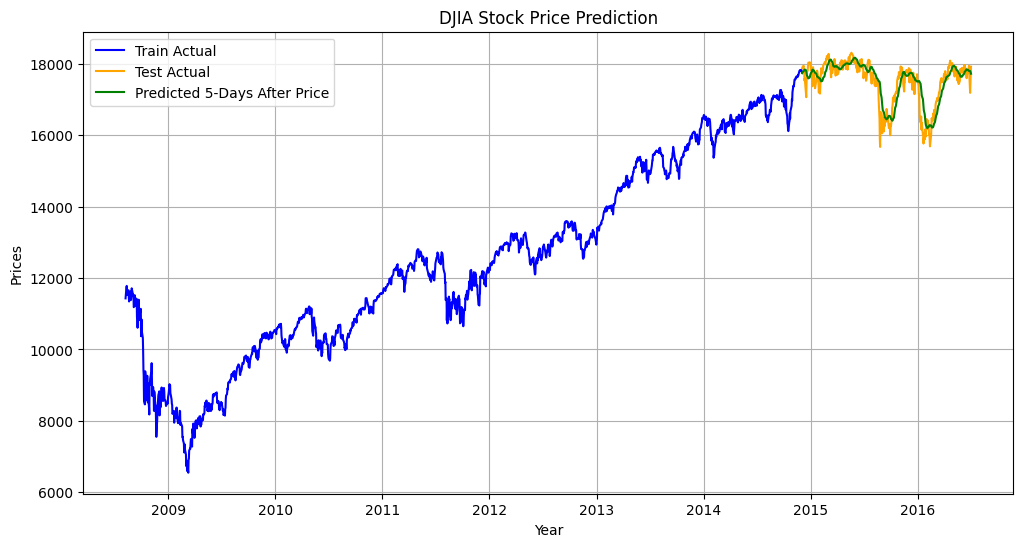

(1, 30, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: 17708.8359375


In [13]:
# Load and preprocess data
def load_and_prepare_data(file_path):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values('Date')
    return data

def scale_data(train_data, test_data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_train_data = scaler.fit_transform(train_data['Open'].values.reshape(-1, 1))
    scaled_test_data = scaler.transform(test_data['Open'].values.reshape(-1, 1))
    return scaled_train_data, scaled_test_data, scaler

def prepare_model_inputs(train_data, test_data, prediction_days, scaler):
    total_dataset = pd.concat((train_data['Open'], test_data['Open']), axis=0)
    model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
    model_inputs = model_inputs.reshape(-1, 1)
    model_inputs = scaler.transform(model_inputs)
    return model_inputs

def create_test_sequences(model_inputs, prediction_days):
    x_test = []
    for i in range(prediction_days, len(model_inputs)):
        x_test.append(model_inputs[i - prediction_days:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    return x_test

def plot_predictions(train_data, test_data):
    plt.figure(figsize=(12, 6))
    plt.plot(train_data['Date'], train_data['Open'], label='Train Actual', color='blue')
    plt.plot(test_data['Date'], test_data['Open'], label='Test Actual', color='orange')
    plt.plot(test_data['Date'], test_data['Predicted'], label='Predicted 5-Days After Price', color='green')
    plt.title('DJIA Stock Price Prediction')
    plt.xlabel('Year')
    plt.ylabel('Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

def make_future_prediction(model, model_inputs, prediction_days, scaler):
    real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs), 0]]
    real_data = np.array(real_data)
    real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
    print(real_data.shape)
    prediction = model.predict(real_data)
    prediction = scaler.inverse_transform(prediction)
    print(f"Prediction: {prediction[0][0]}")

def main():
    file_path = 'upload_DJIA_table.csv'
    prediction_days = 30  # Number of days to use for predictions

    # Load and preprocess data
    data = load_and_prepare_data(file_path)
    train_data, test_data = train_test_split(data, test_size=0.20, shuffle=False)
    scaled_train_data, scaled_test_data, scaler = scale_data(train_data, test_data)

    # Prepare model inputs
    model_inputs = prepare_model_inputs(train_data, test_data, prediction_days, scaler)
    x_test = create_test_sequences(model_inputs, prediction_days)

    # Make predictions
    predicted_prices = model.predict(x_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    # Get actual prices
    actual_prices = test_data['Open'].values

    # Add predicted prices to test data for inspection
    test_data['Predicted'] = predicted_prices
    print(test_data.head(10))

    # Plot predictions
    plot_predictions(train_data, test_data)

    # Make a future prediction
    make_future_prediction(model, model_inputs, prediction_days, scaler)

if __name__ == "__main__":
    main()
